In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
csv_file_path = "log.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to confirm the data has been loaded correctly
df.head()

,Encoding,Height,Width,Trains,Result,Success,Failures,RAM_Failures,Solving Proportion,Horizon Exceeded
0,encodings/multiple/grid/,50,50,5,SUCCESS,98,3,0,0.051418,0
1,encodings/multiple/grid/,50,50,10,SUCCESS,24,2,0,0.063882,0
2,encodings/multiple/grid/,50,50,15,SUCCESS,10,0,0,0.068517,0
3,encodings/multiple/grid/,50,50,20,SUCCESS,6,0,0,0.094285,0
4,encodings/multiple/grid/,50,50,25,SUCCESS,3,2,0,0.139469,0


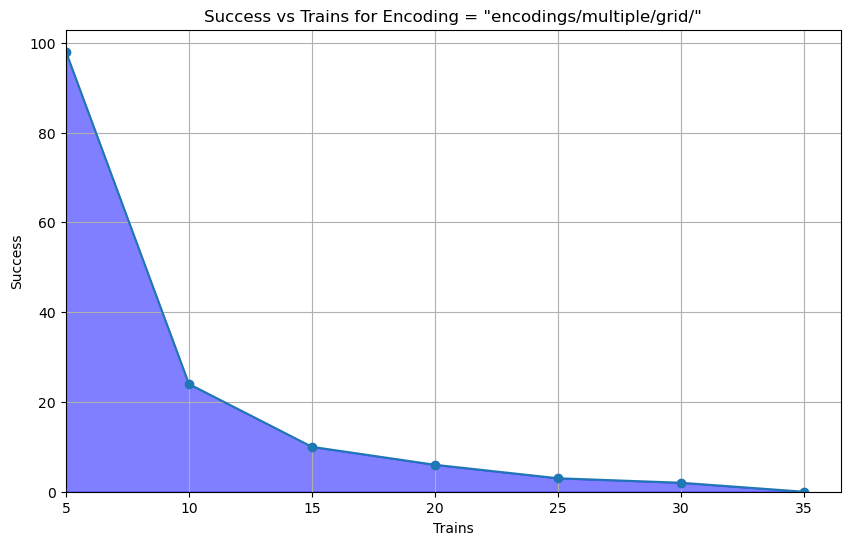

In [19]:
# Filter rows where Encoding is "/encoding/multiple/grid/"
filtered_df = df[df['Encoding'] == 'encodings/multiple/grid/']

# Create a line plot with "Trains" as the x-axis and "Success" as the y-axis
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Trains'], filtered_df['Success'], marker='o')

# Set the x-axis limits to start at 5
plt.xlim(left=5)

# Set the y-axis limits to start at 0
plt.ylim(bottom=0)


# Fill the area below the curve in blue
plt.fill_between(filtered_df['Trains'], filtered_df['Success'], color='blue', alpha=0.5)

plt.xlabel('Trains')
plt.ylabel('Success')
plt.title('Success vs Trains for Encoding = "encodings/multiple/grid/"')
plt.grid(True)
plt.show()

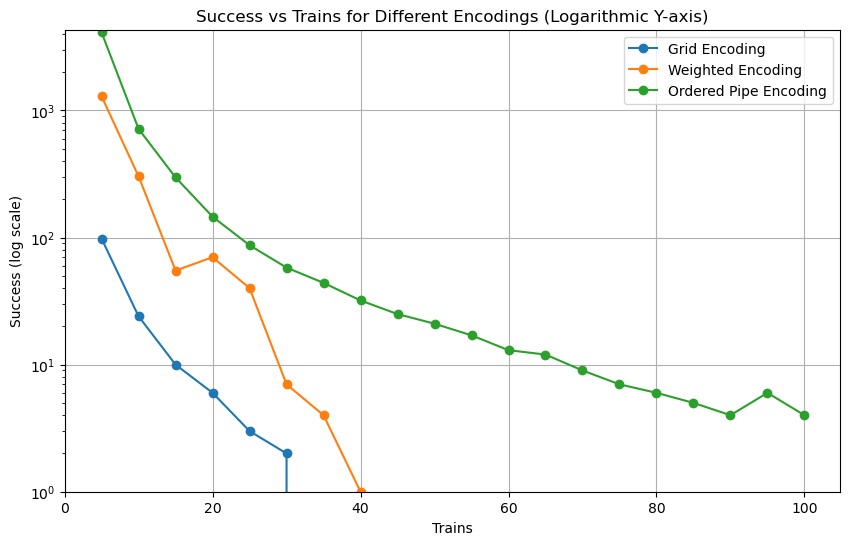

In [20]:
# Filter rows for each encoding
grid_df = df[df['Encoding'] == 'encodings/multiple/grid/']
weighted_df = df[df['Encoding'] == 'encodings/multiple/weighted/']
ordered_pipe_df = df[df['Encoding'] == 'encodings/multiple/ordered_pipe/']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot lines for each encoding
plt.plot(grid_df['Trains'], grid_df['Success'], marker='o', label='Grid Encoding')
plt.plot(weighted_df['Trains'], weighted_df['Success'], marker='o', label='Weighted Encoding')
plt.plot(ordered_pipe_df['Trains'], ordered_pipe_df['Success'], marker='o', label='Ordered Pipe Encoding')

# Set the x-axis limits to start at 5
plt.xlim(left=0)

# Set the y-axis limits to an appropriate range for better visualization
# You can adjust the upper limit as needed
plt.ylim(bottom=1)  # Start y-axis at a small value above zero to avoid squishing

# Set the y-axis scale to logarithmic
plt.yscale('log')

# Add labels and title
plt.xlabel('Trains')
plt.ylabel('Success (log scale)')
plt.title('Success vs Trains for Different Encodings (Logarithmic Y-axis)')

# Add a legend to distinguish the different encodings
plt.legend()

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

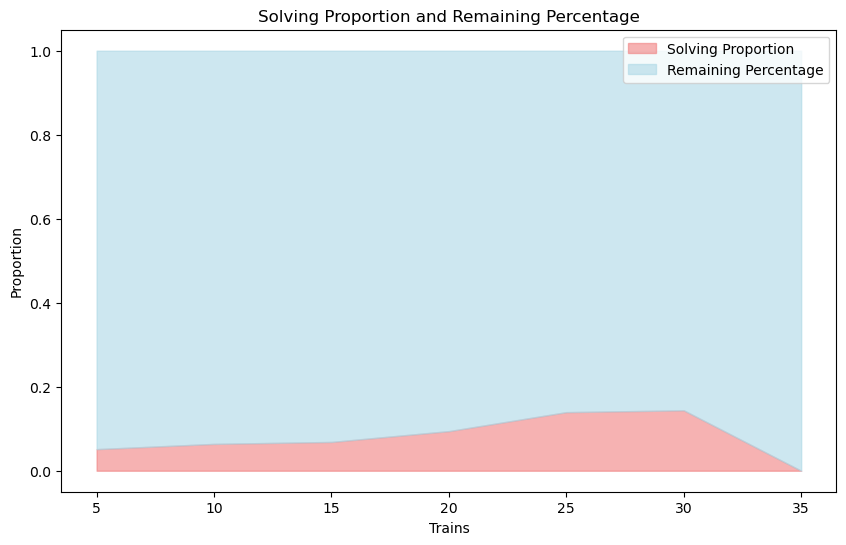

In [21]:
# Filter the DataFrame to include only entries where "Encoding" = "encodings/multiple/grid/"
grid_df = df[df["Encoding"] == "encodings/multiple/grid/"]

# Get the "Trains" and "Solving Proportion" columns
trains = grid_df["Trains"]
solving_proportion = grid_df["Solving Proportion"]

# Calculate remaining percentage (100% - solving proportion)
remaining_percentage = 1 - solving_proportion

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the solving proportion (light red)
plt.fill_between(trains, solving_proportion, color='lightcoral', alpha=0.6, label='Solving Proportion')

# Plot the remaining percentage (light blue)
plt.fill_between(trains, solving_proportion, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')

# Add labels and title
plt.xlabel('Trains')
plt.ylabel('Proportion')
plt.title('Solving Proportion and Remaining Percentage')
plt.legend()

# Show the plot
plt.show()

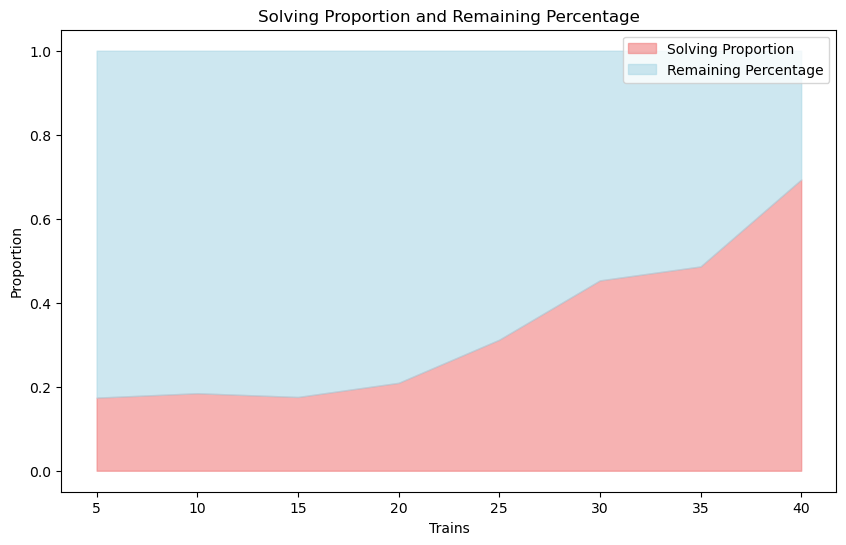

In [22]:
# Filter the DataFrame to include only entries where "Encoding" = "encodings/multiple/grid/"
grid_df = df[df["Encoding"] == "encodings/multiple/weighted/"]

# Get the "Trains" and "Solving Proportion" columns
trains = grid_df["Trains"]
solving_proportion = grid_df["Solving Proportion"]

# Calculate remaining percentage (100% - solving proportion)
remaining_percentage = 1 - solving_proportion

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the solving proportion (light red)
plt.fill_between(trains, solving_proportion, color='lightcoral', alpha=0.6, label='Solving Proportion')

# Plot the remaining percentage (light blue)
plt.fill_between(trains, solving_proportion, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')

# Add labels and title
plt.xlabel('Trains')
plt.ylabel('Proportion')
plt.title('Solving Proportion and Remaining Percentage')
plt.legend()

# Show the plot
plt.show()

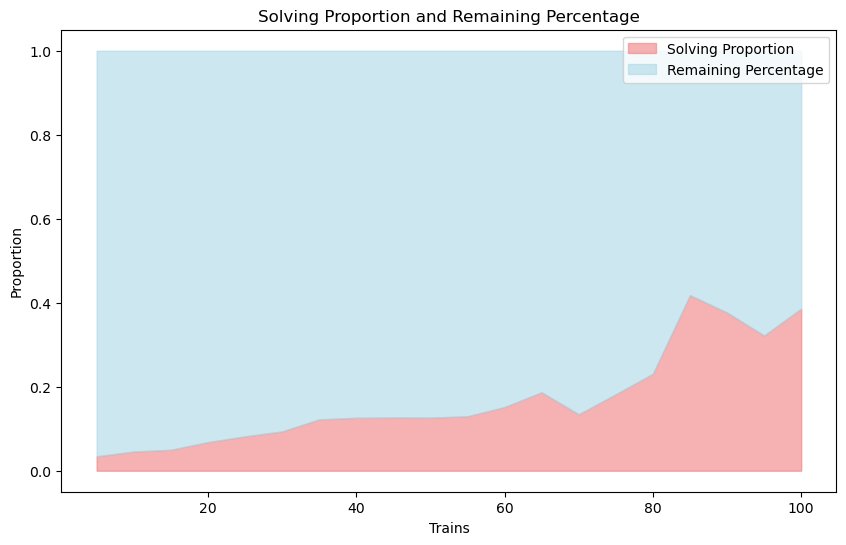

In [23]:
# Filter the DataFrame to include only entries where "Encoding" = "encodings/multiple/grid/"
grid_df = df[df["Encoding"] == "encodings/multiple/ordered_pipe/"]

# Get the "Trains" and "Solving Proportion" columns
trains = grid_df["Trains"]
solving_proportion = grid_df["Solving Proportion"]

# Calculate remaining percentage (100% - solving proportion)
remaining_percentage = 1 - solving_proportion

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the solving proportion (light red)
plt.fill_between(trains, solving_proportion, color='lightcoral', alpha=0.6, label='Solving Proportion')

# Plot the remaining percentage (light blue)
plt.fill_between(trains, solving_proportion, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')

# Add labels and title
plt.xlabel('Trains')
plt.ylabel('Proportion')
plt.title('Solving Proportion and Remaining Percentage')
plt.legend()

# Show the plot
plt.show()